**Working with Multi-Class Classification**
* Dataset: Tensorflow fashion mnist dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
# Visualizing an item
def plot_data(index_choice):
    plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
    plt.title(class_names[train_label[index_choice]])
    plt.show()
    

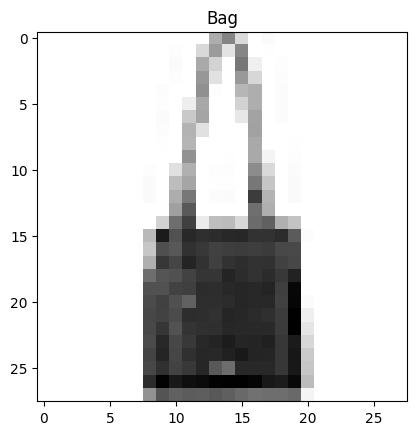

In [5]:
plot_data(200)

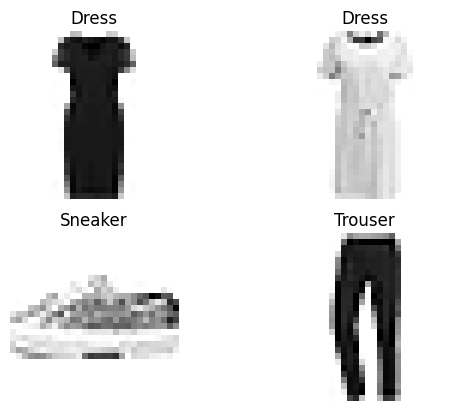

In [6]:
# Visualizing multiple item
import random
plt.Figure=(8,8)
for i in range(4):
    ax =plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.title(class_names[train_label[rand_index]])
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)

In [7]:
train_data[0].shape, test_data[0].shape

((28, 28), (28, 28))

Building a basic model multi-label classification

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.fit(
    train_data,
    train_label,
    epochs=10,
    validation_data = (test_data,test_label)
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0967 - loss: 2.6669 - val_accuracy: 0.2264 - val_loss: 1.9531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2266 - loss: 1.8477 - val_accuracy: 0.2589 - val_loss: 1.7190
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2601 - loss: 1.7181 - val_accuracy: 0.2745 - val_loss: 1.6733
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2840 - loss: 1.6597 - val_accuracy: 0.3103 - val_loss: 1.6221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2956 - loss: 1.6047 - val_accuracy: 0.2911 - val_loss: 1.5978
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3016 - loss: 1.5716 - val_accuracy: 0.2931 - val_loss: 1.5788
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3060 - loss: 1.5642 - val_accuracy: 0.3126 - val_loss: 1.5465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3068 - loss: 1.5524 - 

**Doing feature scaling to see to how it will affect the accuracy**
* scaling
* normalization

In [ ]:
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0, 255, 0, 255)

In [10]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [11]:
train_data_norm.min(),  train_data_norm.max(), test_data_norm.max()

(0.0, 1.0, 1.0)

In [12]:
# new model defination
model_norm = tf.keras.Sequential()
model_norm.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)

# model training
history_norm = model_norm.fit(
    train_data_norm,
    train_label,
    epochs=10,
    validation_data = (test_data_norm,test_label)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3942 - loss: 1.6100 - val_accuracy: 0.6910 - val_loss: 0.8701
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7157 - loss: 0.8182 - val_accuracy: 0.7418 - val_loss: 0.7353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7608 - loss: 0.6953 - val_accuracy: 0.7667 - val_loss: 0.6718
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7782 - loss: 0.6557 - val_accuracy: 0.7742 - val_loss: 0.6444
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7838 - loss: 0.6298 - val_accuracy: 0.7785 - val_loss: 0.6339
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7918 - loss: 0.6141 - val_accuracy: 0.7784 - val_loss: 0.6301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7973 - loss: 0.5919 - val_accuracy: 0.7855 - val_loss: 0.6152
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7980 - loss: 0.5845 - 

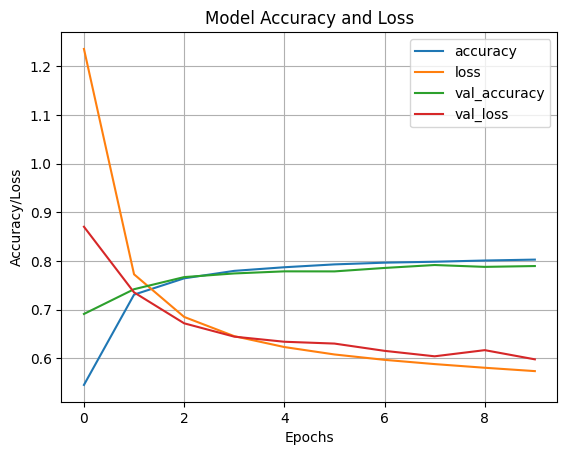

In [13]:
# visualising the loss curves

pd.DataFrame(history_norm.history).plot()
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.grid(True)

Finding the ideal learning rate
* Learning rate scheduler

In [14]:
# new model defination
model_norm_2 = tf.keras.Sequential()
model_norm_2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_2.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.003),
    metrics = ['accuracy']
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# model training
history_norm_2 = model_norm_2.fit(
    train_data_norm,
    train_label,
    epochs=50,
    validation_data = (test_data_norm,test_label),
    callbacks=[lr_scheduler]
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2171 - loss: 2.0999 - val_accuracy: 0.4730 - val_loss: 1.5892 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4939 - loss: 1.4888 - val_accuracy: 0.5327 - val_loss: 1.3109 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5444 - loss: 1.2611 - val_accuracy: 0.5600 - val_loss: 1.1793 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5661 - loss: 1.1481 - val_accuracy: 0.5858 - val_loss: 1.0908 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5869 - loss: 1.0686 - val_accuracy: 0.5983 - val_loss: 1.0280 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6022 - loss: 1.0107 - val_accuracy: 0.6096 - val_loss: 0.9786 - learning_rate: 1.7783e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/ste

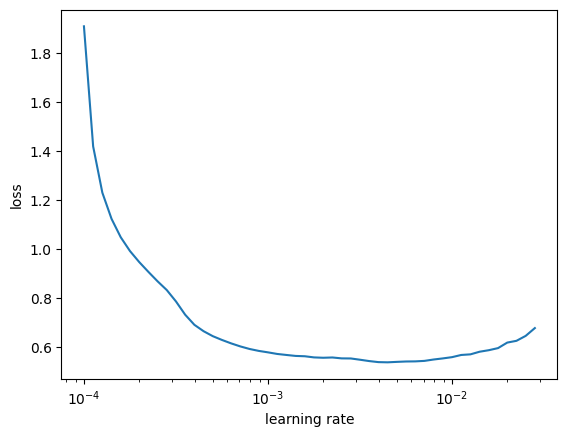

In [19]:
# visualising the learning rate
lrs = 1e-4*10**(tf.range(50)/20)
plt.semilogx(lrs, history_norm_2.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

plt.show()

In [20]:
# new model defination
model_norm_3 = tf.keras.Sequential()
model_norm_3.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm_3.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_3.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_3.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)
# model training
history_norm_3 = model_norm_3.fit(
    train_data_norm,
    train_label,
    epochs=20,
    validation_data = (test_data_norm,test_label)
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4125 - loss: 1.6327 - val_accuracy: 0.6966 - val_loss: 0.8315
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7026 - loss: 0.7745 - val_accuracy: 0.7283 - val_loss: 0.7206
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7471 - loss: 0.6713 - val_accuracy: 0.7626 - val_loss: 0.6661
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7674 - loss: 0.6401 - val_accuracy: 0.7621 - val_loss: 0.6541
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7765 - loss: 0.6172 - val_accuracy: 0.7677 - val_loss: 0.6414
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7822 - loss: 0.6069 - val_accuracy: 0.7737 - val_loss: 0.6365
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7891 - loss: 0.5893 - val_accuracy: 0.7813 - val_loss: 0.6150
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7950 - loss: 0.5746 - 

model evaluation

In [21]:
import itertools
from sklearn.metrics import confusion_matrix
figsizes = (10,10)


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=10):
# defining the matrix
    cm_norn = cm.astype('float32')/cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsizes)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        label = classes
    else:
        label = np.arange(cm.shape[0])

    ax.set(title='confusion matrix',
        xlabel = 'Predicted_labels',
        ylabel = 'True_labels',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = label,
        yticklabels = label,
    )

    threshold  = (cm.max()+cm.min())/2.

    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f'{cm[i,j]} ({cm_norn[i,j]*100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i,j]> threshold else 'black',
                size=text_size)

In [22]:
y_prob = model_norm_3.predict(test_data_norm)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.20238387e-18, 3.60998138e-37, 5.18400461e-11, ...,
        1.04032464e-01, 1.07491847e-04, 6.43599629e-01],
       [3.20918746e-02, 1.19712413e-03, 8.07937503e-01, ...,
        1.42376040e-04, 2.12464426e-02, 2.69151201e-10],
       [8.45848175e-04, 9.98958111e-01, 1.60424810e-04, ...,
        4.61248498e-13, 1.20395043e-07, 1.94158914e-26],
       ...,
       [5.45254115e-05, 2.10029042e-20, 8.60199998e-06, ...,
        1.02026537e-15, 9.56762910e-01, 5.36316454e-25],
       [1.12878745e-02, 9.82188165e-01, 3.85649665e-03, ...,
        2.48495408e-11, 4.84196926e-06, 7.28318716e-21],
       [6.12924711e-11, 1.75175771e-25, 3.24907660e-06, ...,
        2.81692259e-02, 5.34034669e-02, 2.48974166e-03]], dtype=float32)

In [23]:
model_norm_2.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.36038804e-12, 0.00000000e+00, 4.10961035e-20, ...,
        2.84923762e-01, 3.18075848e-07, 6.69843972e-01],
       [3.67142223e-02, 3.14036803e-03, 6.44127965e-01, ...,
        1.65373131e-04, 3.01767723e-03, 1.02765825e-05],
       [3.16385194e-06, 9.99336302e-01, 2.19391232e-15, ...,
        2.81207384e-11, 1.31856405e-06, 1.19283890e-19],
       ...,
       [1.93190873e-02, 8.29473643e-11, 3.11359530e-03, ...,
        2.07998678e-02, 7.08578467e-01, 4.85403056e-04],
       [6.70469944e-06, 9.53081429e-01, 8.38856588e-12, ...,
        1.41514273e-10, 9.68538880e-05, 1.56360280e-17],
       [7.64905053e-07, 5.61266403e-32, 2.89322819e-12, ...,
        1.42708078e-01, 7.04998616e-04, 7.58622540e-03]], dtype=float32)

In [24]:
y_pred = y_prob.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [25]:
class_names[y_pred[0]]

'Ankle boot'

In [26]:
# y_pred = y_prod.argmax(axis=1)
y_pred[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 2, 5, 8, 3, 4, 1, 2, 2, 8, 0],
      dtype=int64)

In [27]:
test_label[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

In [28]:
cm = confusion_matrix(y_true=test_label,y_pred=y_pred)

In [29]:
cm

array([[742,  11,  22,  66,   3,   0, 141,   0,  15,   0],
       [  3, 951,  16,  28,   1,   0,   1,   0,   0,   0],
       [ 14,   3, 695,   6, 169,   0, 106,   0,   7,   0],
       [ 42,  18,  16, 813,  29,   0,  80,   1,   1,   0],
       [  0,   2, 160,  32, 679,   0, 126,   0,   1,   0],
       [  0,   0,   1,   0,   0, 907,   0,  53,  16,  23],
       [140,   2, 118,  43, 148,   0, 532,   1,  16,   0],
       [  0,   0,   0,   0,   0,  43,   0, 927,   1,  29],
       [  0,   0,   9,   2,   5,   9,  47,   8, 920,   0],
       [  0,   0,   1,   0,   0,  43,   0,  58,   1, 897]], dtype=int64)

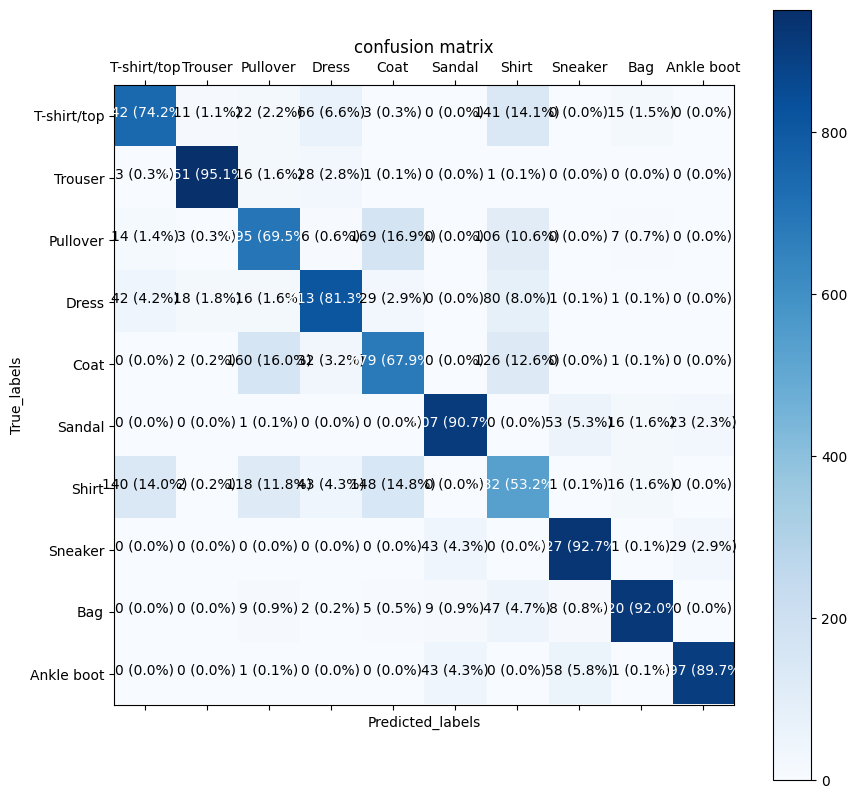

In [32]:
make_confusion_matrix(y_true=test_label, y_pred=y_pred, classes=class_names, figsize=(15,15))

Creating a little function to visualise our preditions to furthur understand our data

In [41]:
import random

def plot_random_image(model, images, true_labels, classes):
    # setting the random number
    random_int = random.randint(0, len(images))

    # creating predictions on the random_int
    pred_probs = model.predict((images[random_int]).reshape(1, 28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[random_int]]

    # plotting the image
    plt.imshow(images[random_int], cmap=plt.cm.binary)

    # change the text color if the prediction matches the true label
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("pred:{} {:2.0f}% (True: {})".format(pred_label, tf.reduce_max(pred_probs)*100, true_label),
                color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


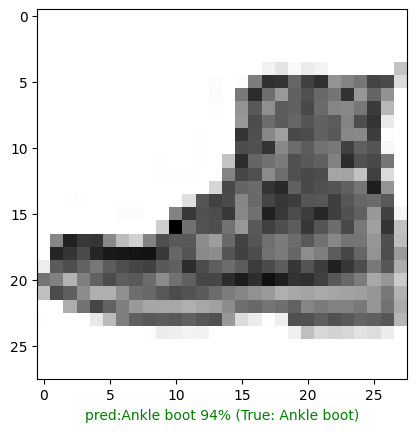

In [45]:
plot_random_image(model_norm_3, test_data_norm, test_label, class_names)